## "Exercises #3, September 10-13, 2019. INFO115 "

### Task 1: Routing. Chapter 12

In [4]:
import networkx as nx
%matplotlib inline

 Consider the example of the Belman-Ford algorithm (page 235-241).
 What are the cheapest routes from A to F and B to F, using four hops? 
 __ACEDF is the cheapest 4 hops router from A to F__
 How much more costly is it to use four hops from A to F and B to F? 
 + _4 hops from A to F = 2 + 3 + 1 + 8 = 14_
 + _4 hops from B to F = 5 + 3 + 1 + 8 = 17_
 + __17 - 14 = 3__
 
### Task 2: End-to-end. 

What is the end-to-end principle? 

_"A basic premise of the principle is that the payoffs from adding features to a simple network quickly diminish, especially in cases in which the end hosts have to implement those functions only for reasons of conformance, i.e. completeness and correctness based on a specification."_ (Saltzer, J. H., D. P. Reed, and D. D. Clark (1984) "End-to-End Arguments in System Design". In: ACM Transactions on Computer Systems 2.4, pp. 277-288.)

Basicaly ot suppose to mean that from node A to node B, and signal could be delivered without interventions in the signal. (Information is the same)

### Task 3: Karate (club) network. 
#### a. Generate the karate network using different layouts. 

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


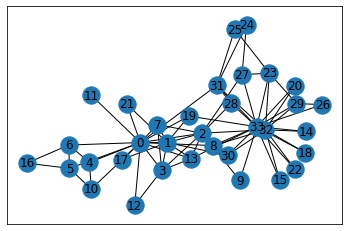

In [10]:
G = nx.karate_club_graph() 
karate_pos = nx.spring_layout(G, k=0.3) 
nx.draw_networkx(G, karate_pos)


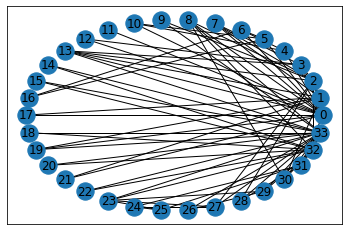

In [4]:
karate_pos = nx.circular_layout(G) 
nx.draw_networkx(G, karate_pos)

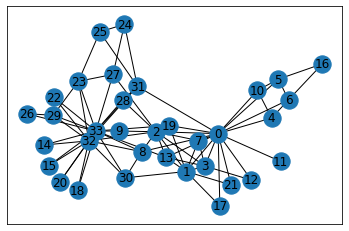

In [10]:
karate_pos = nx.spring_layout(G) 
nx.draw_networkx(G, karate_pos)

#### Find the method for calculating the jaccard-coefficient in the NetworkX documentation. Explain the intuition behind the jaccard coefficient as a method for link prediction


In [35]:
?nx.jaccard_coefficient

http://www.cs.cornell.edu/home/kleinber/link-pred.pdf 
According to Homophily concept, nodes have links with nodes that are simular to them. IF node(A) has links with nodes M...Mn, and node(B) has links with nodes M...Mn, they are connected to the same community , therefore there is higher probability for them to be connected.

#### Calculate the jaccard coefficient for the karate network. 

In [57]:
preds = nx.jaccard_coefficient(G)
for u, v, p in preds: 
    print(u, v, p)

0 32 0.12
0 33 0.13793103448275862
0 9 0.058823529411764705
0 14 0.0
0 15 0.0
0 16 0.125
0 18 0.0
0 20 0.0
0 22 0.0
0 23 0.0
0 24 0.05555555555555555
0 25 0.05555555555555555
0 26 0.0
0 27 0.05263157894736842
0 28 0.11764705882352941
0 29 0.0
0 30 0.1111111111111111
1 4 0.09090909090909091
1 5 0.08333333333333333
1 6 0.08333333333333333
1 8 0.2727272727272727
1 9 0.1
1 10 0.09090909090909091
1 11 0.1111111111111111
1 12 0.2222222222222222
1 14 0.0
1 15 0.0
1 16 0.0
1 18 0.0
1 20 0.0
1 22 0.0
1 23 0.0
1 24 0.0
1 25 0.0
1 26 0.0
1 27 0.08333333333333333
1 28 0.09090909090909091
1 29 0.0
1 31 0.07142857142857142
1 32 0.10526315789473684
1 33 0.13043478260869565
2 4 0.08333333333333333
2 5 0.07692307692307693
2 6 0.07692307692307693
2 10 0.08333333333333333
2 11 0.1
2 12 0.2
2 14 0.09090909090909091
2 15 0.09090909090909091
2 16 0.0
2 17 0.2
2 18 0.09090909090909091
2 19 0.18181818181818182
2 20 0.09090909090909091
2 21 0.2
2 22 0.09090909090909091
2 23 0.15384615384615385
2 24 0.083333333

#### Why do the coefficient have the value 0 for some pairs of nodes? 

Because two nodes no not have shared neighbors 

#### Calculate the jaccard coefficients for the nodes (0, 33) and (1, 8). 
Looking at the graph, do you think the jaccard coefficient is a plausible measure of similarity in this case?  

0 33 0.13793103448275862
1 8 0.2727272727272727


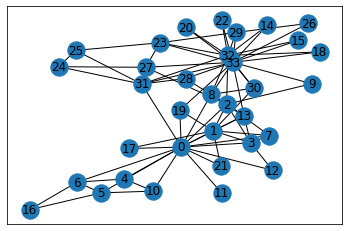

In [59]:
preds = nx.jaccard_coefficient(G, [(0,33),(1,8)])
for u, v, p in preds: 
    print(u, v, p)
nx.draw_networkx(G, karate_pos)

I mean, 0 and 33 are connected, and 1 and 8 are not, but in general I could not find any problems here.

#### Read about the draw_networkx method in the NetworkX-documentation and try it out on the karate network with different values for the parameters: start by changing the colors of the karate-graph:

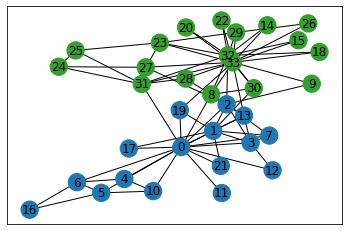

In [62]:
member_club = [ 
    0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 
0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 
1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 
1, 1, 1, 1]
for node_id in G.nodes: 
    G.nodes[node_id]["club"] = member_club[node_id]

node_colors = [ '#1f78b4' if G.nodes[v]["club"] == 0 
               else '#33a02c' for v in G] 

nx.draw_networkx(G, karate_pos, label=True, node_color=node_colors)

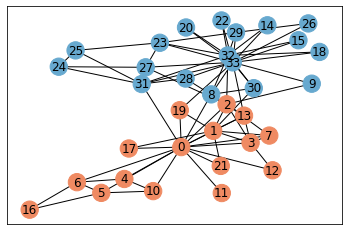

In [83]:
node_colors = [ '#ef8a62' if G.nodes[v]["club"] == 0 
               
               else '#67a9cf' for v in G] 

nx.draw_networkx(G, karate_pos, label=False, node_color=node_colors)

#### What is the minimum set of nodes you have to remove for the graph disconnect? 

In [103]:
node_cut = nx.minimum_node_cut(G)
node_cut
# only one node. "0", as far as I remremember it is John A

{0}

#### Identify one other clique in the graph than the maximal one (see the lecture notes) and color it.  

In [11]:
cliques = list(nx.find_cliques(G))
cliques

# Find max clique
max_clique = max(cliques, key=len)
max_clique

[0, 1, 2, 3, 13]

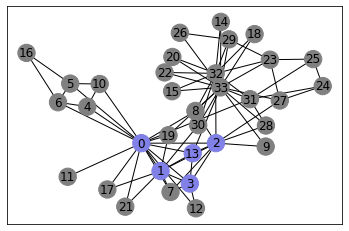

In [16]:
# Visualize maximum clique
node_color = [(0.5, 0.5, 0.5) for v in G.nodes()]

for i, v in enumerate(G.nodes()):
    if v in max_clique:
        node_color[i] = (0.5, 0.5, 0.9)
    
nx.draw_networkx(G, node_color=node_color)

### Task 4 Generate a small world network (Watts-Strogaz graph). 
Experiments with at least three different numbers of nodes, edges and probabilities for rewinding. 
How are the clustering coefficient and the average shortest path length affected? 
Compare with Illustration 14.14 in Brinton.

In [ ]:
import matplotlib.pyplot as plt

5.35632183908046
2.4229885057471265
2.018390804597701
6.3
2.7756410256410255
2.7423076923076923
2.9602564102564104


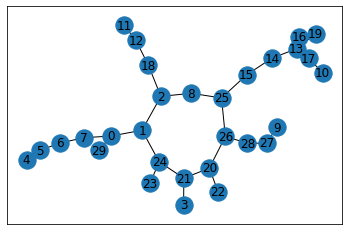

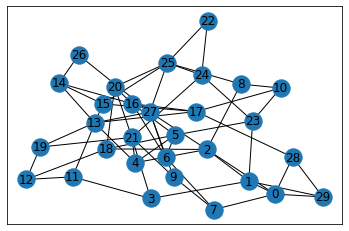

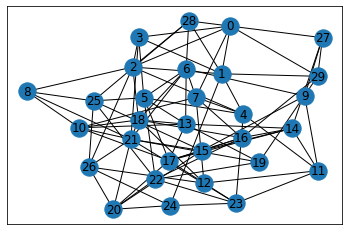

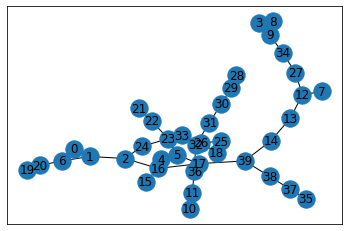

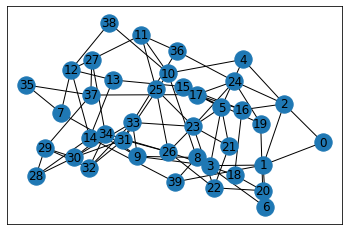

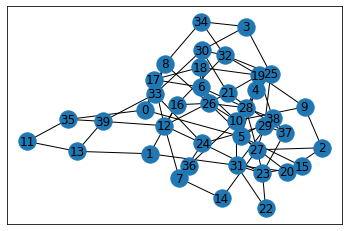

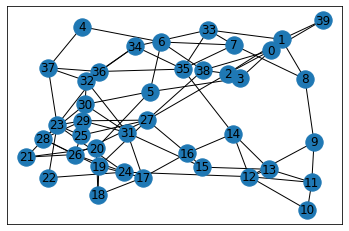

In [76]:


number = [(30, 2, 0.5), (30, 4, 0.5), (30, 6, 0.5), (40, 2, 0.5), (40, 4, 0.5), (40, 4, 0.8), (40, 4, 0.3)]

for n, k, p in number:
    G_small = nx.watts_strogatz_graph(n = n, k = k , p = p, seed = 6)
    plt.figure()
    nx.draw_networkx(G_small)
    shp = nx.average_shortest_path_length(G_small)
    print(shp)
    

Increasing probability of connection to different part of the small world highly decrease average short path. If network looks like sausage, and not connected to a circle, avg.shortest.path will be really huge.
in properrly conected networks density plays important role
Same with clustering coefficient, but it is much more important on a low network density,because brige to a opposite part of the world could significantly decrease avg. network path.

### Task 5
#### a. What is the probability of a correct cascade (assuming that ‘1’ is correct)?
the chance of a correct cascade is 72% -- both 1, and 1 0, but flip
#### b. Assume that a cascade did not arise in the first round of three people. What is the probability of a true cascade arising after a second round?
 0.0041 (chance of no cascade after 3 people) * 0.72 (chance to form true cascade) = 0.002952 == 0.3%
#### c. Why would a cascade stop if people started to announce their private signal?
Will if people gonna relay on the actual information about the world, then there are much less chances to be biased about situation, because first 2-3 people could not decide everything.
#### d. Do you think the cascade model can explain fads on social media? Explain.
Yes but actually no.
Most of the people have their own strong preferences and could be barely influenced by people with different opintion, because they are not connected with people of different opinion (homophily). And only few people somewhere in between . If two opposite groups are +- equal to each other , then undecided people could play mojor role with crowd wisdom or cascade model, but in general, they do not influence on anything  